In [1]:
import numpy as np
import LU
import math
import sympy as sp

In [2]:
def integra_polinomial(formula,intervalo_integracao,pontos_de_integracao):
    '''N pontos de integracao: Integra corretamente um polinomio de ordem N-1'''
    N = pontos_de_integracao
    a,b = map(float,intervalo_integracao)
    
    #Inicializando o vetor de pontos X que serao utilizados
    if N == 1: #Mid point
        X_pontos = np.array([(a+b)/2],float)
    elif N == 2: #Trapezio
        X_pontos = np.array([a,b],float)
    else:
        delta = (b-a)/(N-1)
        X_pontos = np.array([a+j*delta for j in range(N)])
        
        
    #Inicializando matriz de Vandermonde e matriz_b para descobrir o peso atraves de um sistema linear
    vander = np.eye(N)
    matriz_b = np.array([[0] for z in range(N)],float)

    for i in range(N):
        matriz_b[i] = (b**(i+1)-a**(i+1))/(i+1) 

        for j in range(N):
            vander[i,j] = X_pontos[j]**i
    _,_,pesos = LU.fact_lu(vander,matriz_b)
    
    integral = sum(formula(x)*w for x,w in zip(X_pontos,pesos))
    
    return float(integral)
    
    
    
    

In [3]:
formula_exemplo = lambda x: math.exp(-(x**2))

In [4]:
integra_polinomial(formula_exemplo,[0,1],5)

0.7468337098497525

In [5]:
pesos_gauss = {
    2 : [np.array([1.0, 1.0]),
      np.array([-0.5773502691896257, 0.5773502691896257])],
    3 : [np.array([0.8888888888888888, 0.5555555555555556, 0.5555555555555556]),
         np.array([0.0, -0.7745966692414834, 0.7745966692414834])],
    4 : [np.array([0.6521451548625461, 0.6521451548625461,
                      0.3478548451374538, 0.3478548451374538]),
        np.array([-0.3399810435848563, 0.3399810435848563,
                      -.8611363115940526, 0.8611363115940526])],
    5: [np.array([0.5688888888888889, 0.4786286704993665,
                      0.4786286704993665, 0.2369268850561891, 0.2369268850561891]),
       np.array([0.0, -0.5384693101056831, 0.5384693101056831,
                      -0.9061798459386640, 0.9061798459386640])],
    6: [np.array([0.3607615730481386, 0.3607615730481386, 0.4679139345726910,
                      0.4679139345726910, 0.1713244923791704, 0.1713244923791704]),
       np.array([0.6612093864662645, -0.6612093864662645, -0.2386191860831969,
                      0.2386191860831969, -0.9324695142031521, 0.9324695142031521])],
    7: [np.array([0.4179591836734694, 0.3818300505051189, 0.3818300505051189,
                      0.2797053914892766, 0.2797053914892766, 0.1294849661688697, 0.1294849661688697]),
       np.array([0.0, 0.4058451513773972, -0.4058451513773972, -0.7415311855993945,
                      0.7415311855993945, -0.9491079123427585, 0.9491079123427585])],
    8: [np.array([0.3626837833783620, 0.3626837833783620, 0.3137066458778873, 0.3137066458778873,
                      0.2223810344533745, 0.2223810344533745, 0.1012285362903763, 0.1012285362903763]),
       np.array([-0.1834346424956498, 0.1834346424956498, -0.5255324099163290, 0.5255324099163290,
                      -0.7966664774136267, 0.7966664774136267, -0.9602898564975363, 0.9602898564975363])],
    9: [np.array([0.3302393550012598, 0.1806481606948574, 0.1806481606948574, 0.0812743883615744,
                0.0812743883615744, 0.3123470770400029, 0.3123470770400029, 0.2606106964029354, 0.2606106964029354]),
       np.array([0.0, -0.8360311073266358, 0.8360311073266358, -0.9681602395076261, 0.9681602395076261,
                      -0.3242534234038089, 0.3242534234038089, -0.6133714327005904, 0.6133714327005904])],
    10:[np.array([0.2955242247147529, 0.2955242247147529, 0.2692667193099963, 0.2692667193099963, 0.2190863625159820,
                      0.2190863625159820, 0.1494513491505806, 0.1494513491505806, 0.0666713443086881, 0.0666713443086881]),
        np.array([-0.1488743389816312, 0.1488743389816312, -0.4333953941292472, 0.4333953941292472, -0.6794095682990244,
                      0.6794095682990244, -0.8650633666889845, 0.8650633666889845, -0.9739065285171717, 0.9739065285171717])]
}


def quadratura_gauss(formula,intervalo_integracao,pontos_de_integracao):
    '''N pontos de integracao: Integra corretamente um polinomio de ordem 2*N-1'''
    a,b = map(float,intervalo_integracao)
    N = pontos_de_integracao
    L = b-a
    if N == 1:
        #Mid-point!
        integral = formula((b+a)/2.0)*L
        return integral
    peso,abscissa = pesos_gauss[N]
    x_z = lambda z: (a+b+z*L)/2.0 # Isso define x em funcao de z para obter g(z)
    integral = L/2.0*sum(formula(x_z(z))*w for z,w in zip(abscissa,peso))
    return integral
    

In [6]:
gauss_exemplo = lambda x: 2 + x + 2*x**2
quadratura_gauss(gauss_exemplo,[1,3],2)

25.333333333333332

In [7]:
func_ex1 = lambda x:1/math.sqrt(2*math.pi)*math.exp(-1/2*x**2)

In [8]:
integra_polinomial(func_ex1,[0,1],3)

0.3415290519962957

In [9]:
quadratura_gauss(func_ex1,[0,1],2)

0.3412211416986809

In [10]:
integra_polinomial(func_ex1,[0,5],6)

0.49755058901774807

In [11]:
quadratura_gauss(func_ex1,[0,5],5)

0.5004474475195483

### EX 2

In [12]:
RAO = lambda w: 1/math.sqrt((1-(w/1.0)**2)**2+(2*0.05*w/1.0)**2)
S = lambda w: RAO(w)**2*2.0


Plotando a funcao para ver seu comportamento no intervalo [0,10]:

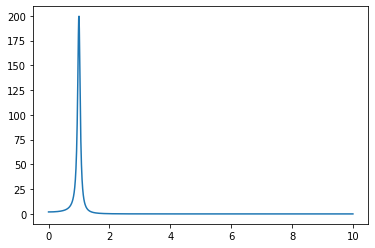

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
X = np.linspace(0,10,1000)
Vetorizacao_S = np.vectorize(S)
plt.plot(X,Vetorizacao_S(X))


Fazendo a integral indefinida analiticamente obtem-se uma expressao com numeros complexos. Ao definir um limite [0,10], obtem-se o resultado 31.4153. 

(https://www.wolframalpha.com/input/?i=%E2%88%AB2*%281%2F%E2%88%9A%28%281-w**2%29**2%2B%282*0.05*w%2F1.0%29**2%29%29**2dw+from+0+to+10)

#### m0:

In [14]:
for n in range(1,11):
    print(f'N = {n}: {integra_polinomial(S,[0,10],n)}')

N = 1: 0.03470715835140998
N = 2: 10.001020199959193
N = 3: 3.3568115055540027
N = 4: 2.577508854893364
N = 5: 1.820086786708735
N = 6: 1.9152889307432974
N = 7: 2.608302882258963
N = 8: 4.6664485068228965
N = 9: 13.227748281908857
N = 10: 52.85924970138235


In [15]:
for n in range(1,11):
    print(f'N = {n}: {quadratura_gauss(S,[0,10],n)}')


N = 1: 0.03470715835140998
N = 2: 0.8320929927115737
N = 3: 64.84830061104871
N = 4: 12.809405305456076
N = 5: 4.147474355832165
N = 6: 3.233216865682075
N = 7: 7.555794033919728
N = 8: 195.21080209592125
N = 9: 17.05580203189161
N = 10: 6.598559615255326


Para ambos os algoritmos, o valor da integral muda significativamente dependendo do numero de pontos de integracao. Como essas tecnicas foram desenvolvidas com base para integrar funcoes polinomiais, para essa funcao, nao da para saber exatamente quantos pontos de integracao sao necessarios. Definitivamente nao sao 10. 

#### m2:

In [16]:
m2 = lambda w:w**2*S(w)

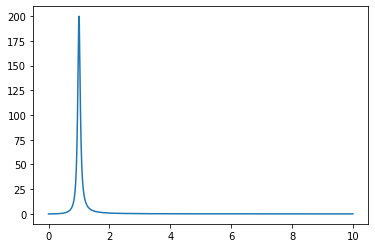

In [17]:
Vetorizacao_m2 = np.vectorize(m2)
plt.plot(X,Vetorizacao_m2(X))

In [18]:
for n in range(1,11):
    print(f'N = {n}: {integra_polinomial(m2,[0,10],n)}')

N = 1: 0.8676789587852496
N = 2: 0.10201999591920015
N = 3: 0.6124593044965665
N = 4: 1.016305388474979
N = 5: 1.8714222786921193
N = 6: 2.7507528734524858
N = 7: 4.932781274677633
N = 8: 8.319639858133103
N = 9: 20.120283032031445
N = 10: 65.2099810484252


In [19]:
for n in range(1,11):
    print(f'N = {n}: {quadratura_gauss(m2,[0,10],n)}')

N = 1: 0.8676789587852496
N = 2: 3.8700950795315676
N = 3: 82.80539866973832
N = 4: 7.059435520204341
N = 5: 2.5696978971748283
N = 6: 3.75969560675518
N = 7: 10.987739286122974
N = 8: 201.78399833694257
N = 9: 12.564682282723105
N = 10: 5.35698500920671


Tambem nao e possivel

### Questao 4

In [20]:
from math import pi,exp,sqrt
Sn_ex4 = lambda w: 4*pi**3*3.0**2/(w**5*5.0**4)*exp(-(16*pi**3)/(w**4*5.0**4))
S_ex4 = lambda w: RAO(w)**2*Sn_ex4(w)

https://www.wolframalpha.com/input/?i=%E2%88%AB4*pi**3*3.0**2%2F%28w**5*5.0**4%29*exp%28-%2816*pi**3%29%2F%28w**4*5.0**4%29%29*%281%2F%E2%88%9A%28%281-w**2%29**2%2B%282*0.05*w%2F1.0%29**2%29%29**2dw+from+0+to+10

Plotando para observar o comportamento:

In [21]:
Vetorizacao_S_ex4 = np.vectorize(S_ex4)
try:
    plt.plot(X,Vetorizacao_S_ex4(X))
except ZeroDivisionError:
    print('Divisao por 0')

Divisao por 0


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [22]:
for n in range(1,11):
    print(f'N = {n}: {integra_polinomial(S_ex4,[0,10],n)}')

N = 1: 9.905116320065648e-06
N = 2: nan
N = 3: nan
N = 4: nan
N = 5: nan
N = 6: nan
N = 7: nan
N = 8: nan
N = 9: nan
N = 10: nan


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [23]:
for n in range(1,11):
    print(f'N = {n}: {quadratura_gauss(S_ex4,[0,10],n)}')

N = 1: 9.905116320065648e-06
N = 2: 0.016888162997259076
N = 3: 19.467277817509128
N = 4: 2.316734483073126
N = 5: 0.003399575333912638
N = 6: 0.05955365220462492
N = 7: 1.1193237326149836
N = 8: 75.85330094257573
N = 9: 6.591566942728261
N = 10: 0.7532902132971433


#### m2:

In [24]:
m2_ex4 = lambda w:w**2*S_ex4(w)

In [25]:
for n in range(1,11):
    print(f'N = {n}: {integra_polinomial(m2_ex4,[0,10],n)}')

N = 1: 0.0002476279080016412
N = 2: nan
N = 3: nan
N = 4: nan
N = 5: nan
N = 6: nan
N = 7: nan
N = 8: nan
N = 9: nan
N = 10: nan


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [26]:
for n in range(1,11):
    print(f'N = {n}: {quadratura_gauss(m2_ex4,[0,10],n)}')

N = 1: 0.0002476279080016412
N = 2: 0.07542400330340233
N = 3: 24.72679048966965
N = 4: 1.1184281672518546
N = 5: 0.018102641113009077
N = 6: 0.1712329670394387
N = 7: 1.8711970931384
N = 8: 78.41093590426087
N = 9: 4.464310594729089
N = 10: 0.48426836843985044


### EX 5

In [27]:
funcao_ex5 = lambda x:2+2*x-x**2+3*x**3


Tendo N o numero de pontos de integracao, para integrar corretamente uma funcao atraves da Integracao Polinomial, torna-se necessario que N-1 >= ordem do polinomio. Nesse caso, o numero minimo de pontos de integracao e 4, uma vez que esta funcao e um polinomio de ordem 3


In [28]:
integra_polinomial(funcao_ex5,[0,4],4)

194.66666666666666

Usando a tecnica da Quadratura de Gauss, N pontos de integracao integram corretamente um polinomio de ordem 2N-1. Logo, como a ordem do polinomio e 3, 2N-1 >=3. Minimo N = 2

In [29]:
quadratura_gauss(funcao_ex5,[0,4],2)

194.66666666666666

### Ex 6

In [30]:
func_ex6 = lambda x: 1/(1+x**2)

Tendo os limites [0,3]

Pela Regra do Mid-point:

In [31]:
M = func_ex6((3.0+0)/2.0)*(3-0)
M

0.9230769230769231

Pela Regra do Trapezio:

In [32]:
T = (func_ex6(0)+func_ex6(3))/2.0*(3-0)
T

1.6500000000000001

Obtendo o valor da Regra de Simpson por M e T:

In [33]:
Simpson = 2/3*M + 1/3*T
Simpson

1.1653846153846155

Obtendo a estimativa de erro e a consequente integral, considerando o erro:

In [34]:
Erro = (T - M)/3.0
Erro

0.24230769230769234

Reavaliando o valor da integral:

In [35]:
A = M + Erro
A

1.1653846153846155

Utilizando a Quadratura de Gauss para obter a integral e fazer a comparacao:

In [36]:
quadratura_gauss(func_ex6,[0,3],7)

1.2490605128576824

Analiticamente, a integral indefinida e dada por arctg(x)

In [37]:
math.atan(3) - math.atan(0)

1.2490457723982544

Nota-se que o valor obtido pela Quadratura de Gauss e bem proximo da solucao analitica, enquanto que, utilizando Mid-Point e Trapezio, o valor so se aproxima da solucao analitica quando considerado o erro.

### EX 7

In [38]:
pesos_hermite = {
    1:[np.array([0],float),
      np.array([1.7724538509055160272981674833411])],
    
    2:[np.array([-0.7071067811865475244008,0.7071067811865475244008]),
      np.array([0.8862269254527580136491,0.886226925452758013649])],
    
    3:[np.array([-1.224744871391589049099,0.0,
                1.224744871391589049099]),
      np.array([0.295408975150919337883,1.181635900603677351532,
                0.295408975150919337883])],
    
    4:[np.array([-1.650680123885784555883,-0.5246476232752903178841,
                 0.5246476232752903178841,1.650680123885784555883]),
      np.array([0.081312835447245177143,0.8049140900055128365061,
                0.8049140900055128365061,0.08131283544724517714303])],
    
    5:[np.array([-2.020182870456085632929,-0.9585724646138185071128,
            0.0,0.9585724646138185071128,2.020182870456085632929]),
      np.array([0.01995324205904591320774,0.3936193231522411598285,
                0.9453087204829418812257,0.393619323152241159828,
                0.01995324205904591320774])],
    
    6:[np.array([-2.350604973674492222834,-1.335849074013696949715,
            -0.4360774119276165086792,0.436077411927616508679,
            1.335849074013696949715,2.350604973674492222834]),
      np.array([0.004530009905508845640857,0.1570673203228566439163,
            0.7246295952243925240919,0.724629595224392524092,
            0.1570673203228566439163,0.004530009905508845640857])],
    
    7:[np.array([-2.651961356835233492447,-1.673551628767471445032,
            -0.8162878828589646630387,0.0,0.8162878828589646630387,
            1.673551628767471445032,2.651961356835233492447]),
      np.array([9.71781245099519154149e-4,0.05451558281912703059218,
        0.4256072526101278005203,0.810264617556807326765,
        0.4256072526101278005203,0.0545155828191270305922,
        9.71781245099519154149e-4])],
    
    8:[np.array([-2.930637420257244019224,-1.981656756695842925855,
        -1.157193712446780194721,-0.3811869902073221168547,
        0.3811869902073221168547,1.157193712446780194721,
        1.981656756695842925855,2.930637420257244019224]),
      np.array([1.99604072211367619206e-4,0.0170779830074134754562,
        0.2078023258148918795433,0.6611470125582412910304,
        0.6611470125582412910304,0.2078023258148918795433,
        0.0170779830074134754562,1.996040722113676192061e-4])],
    
    9:[np.array([-3.19099320178152760723,-2.266580584531843111802,
        -1.468553289216667931667,-0.7235510187528375733226,
        0.0,0.7235510187528375733226,1.468553289216667931667,
        2.266580584531843111802,3.19099320178152760723]),
      np.array([3.960697726326438190459e-5,0.00494362427553694721722,
        0.088474527394376573288,0.4326515590025557501998,
        0.7202352156060509571243,0.4326515590025557502,
        0.088474527394376573288,0.004943624275536947217225,
        3.96069772632643819046e-5])],
    
    10:[np.array([-3.436159118837737603327,-2.532731674232789796409,
        -1.756683649299881773451,-1.036610829789513654178,
        -0.3429013272237046087892,0.3429013272237046087892,
        1.036610829789513654178,1.756683649299881773451,
        2.532731674232789796409,3.436159118837737603327]),
      np.array([7.64043285523262062916e-6,0.001343645746781232692202,
        0.0338743944554810631362,0.2401386110823146864165,
        0.6108626337353257987836,0.6108626337353257987836,
        0.2401386110823146864165,0.03387439445548106313616,
        0.001343645746781232692202,7.64043285523262062916e-6])]
}

#### A1:

Fazendo substituicao $u^2 = \frac{1}2x^2$. Tem-se que $dx = \frac{2}{\sqrt{2}}du$ e os novos limites de integracao sao [$-\infty$,$\frac{1}{\sqrt{2}}$]

$$\int_{-\infty}^{\sqrt{2}^{-1}}\frac{1}{\sqrt{2\pi}}exp(-u^2)\frac{2}{\sqrt{2}}du$$

Finalmente e possivel utilizar gauss-hermite!

In [39]:
func_a1 = lambda u : 1/sqrt(2*pi)*2/sqrt(2)*exp(-u**2)

In [40]:
func_hermite_a1 = lambda u: 1/sqrt(2*pi)*2/sqrt(2)

In [41]:
def hermitao(formula,pontos_integracao):
    N = pontos_integracao
    X,w = pesos_hermite[N]
    integral = sum(formula(x)*peso for x,peso in zip(X,w))
    return integral

In [42]:
hermitao(func_hermite_a1,8)

0.9999999999999999

O valor 0.9999999999999999 refere-se a integral de $-\infty$ ate $\infty$. Tendo que a funcao e par, consegue-se obter a integral de $-\infty$ ate 0 apenas dividindo 0.9999999999999999 por 2. A segunda parte da integral pode ser calculada atraves de uma quadratura de gauss normal, tendo o limite de 0 a $\frac{1}{\sqrt{2}}$

In [43]:
parte_1_hermitao = 1.0/2
parte_2_hermitao = quadratura_gauss(func_a1,[0,1/sqrt(2)],5)
integral = parte_1_hermitao + parte_2_hermitao
integral

0.8413447460632024

#### A2:

Usando a mesma substituicao $u^2 = \frac{1}2x^2$ e $dx = \frac{2}{\sqrt{2}}du$, tem-se que A2 corresponde a:<br>$$\int_{-\infty}^{\infty}2\frac{u^2}{\sqrt{2\pi}}exp(-u^2)\frac{2}{\sqrt{2}}du$$

In [44]:
func_a2 = lambda u:2*u**2/sqrt(2*pi)*exp(-u**2)*2/sqrt(2)
func_hermite_a2 = lambda u:2*u**2/sqrt(2*pi)*2/sqrt(2)

In [45]:
hermitao(func_hermite_a2,10)

1.0

# PARTE 2 : DIFERENCIACAO

### Tarefa 1)

In [52]:
def derivada(formula,X,delta_x=1.0e-4,metodo='central'):
    der = {
        'central': ((formula(X+delta_x) - formula(X - delta_x))/
                    (2.0*delta_x)),
        'frente': (formula(X+delta_x)-formula(X))/delta_x,
        
        'tras': (formula(X)-formula(X-delta_x))/delta_x 
    }
    return der[metodo]

### Tarefa 2)

Aprimorando o programa utilizando o procedimento de interpolação de Richard:

In [53]:
def derivada_richard(formula,X,delta_x_1=1.0e-4,delta_x_2=0.5e-4,metodo='central',p=1):
    d1 = derivada(formula,X,delta_x_1,metodo)
    d2 = derivada(formula,X,delta_x_2,metodo)
    q = delta_x_1/delta_x_2
    a0 = d1 + (d1-d2)/(q**(-p)-1)
    return a0
    

### Exercicio 1)

Utilizando osprograma  desenvolvidos  nas  Tarefas  1  e  2;  calcule  as  derivadas  das  seguintes funções nos pontos indicados e compare com os valores analíticos

$$f(x)=x^3+\frac{1}{e^x}$$ no ponto $x=3$

In [62]:
parte2_func1 = lambda x: x**3 + 1/exp(x)

Metodo central:

In [63]:
derivada(parte2_func1,3,metodo='central')

26.95021294160327

Metodo passo para frente:

In [64]:
derivada(parte2_func1,3,metodo='frente')

26.951115430975392

Passo para tras:

In [65]:
derivada(parte2_func1,3,metodo='tras')

26.949310452231146

Usando Richard com p=1:

In [68]:
derivada_richard(parte2_func1,3,p=1,metodo='central')

26.95021292657529

Analiticamente:$$\frac{df(x)}{d(x)} = 3x^2 - \frac{1}{e^x}$$

no ponto $x=3$, o resultado analitico e dado por **26.950212931**. Conclusao: funcao bem comportada, os valores calculados por todos os metodos numericos das tarefas 1 e 2 se aproximam bastante da solucao analitica!

#### 2)

$$f(x)=x^{1/3} + ln(x)$$ no ponto $x=2$

In [71]:
parte2_func2 = lambda x: x**(1/3)+math.log(x)

Metodo central:

In [72]:
derivada(parte2_func2,2,metodo='central')

0.7099868421622801

Metodo passo para frente:

In [73]:
derivada(parte2_func2,X=2,metodo='frente')

0.7099708423830009

Metodo passo para tras:

In [74]:
derivada(parte2_func2,X=2,metodo='tras')

0.7100028419415594

Usando Richard com p=1:

In [77]:
derivada_richard(parte2_func2,2,p=1)

0.7099868413895649

Analiticamente:$$\frac{df(x)}{d(x)}=\frac{1}{3x^{2/3}} + \frac{1}x$$ No ponto x=2, o resultado analitico e dado por **0.709986841**.Conclusao: funcao bem comportada, os valores calculados por todos os metodos numericos das tarefas 1 e 2 se aproximam bastante da solucao analitica!

#### 3)

$$f(x)=1-exp(-\frac{x^2}{25})$$ no ponto x=6

In [76]:
parte2_func3 = lambda x:1-exp(-x**2/25.0)

Metodo central:

In [78]:
derivada(parte2_func3,6,metodo='central')

0.11372532416509262

Metodo passo para frente:

In [79]:
derivada(parte2_func3,6,metodo='frente')

0.11372354246863559

Metodo passo para tras:

In [80]:
derivada(parte2_func3,6,metodo='tras')

0.11372710586154966

Usando Richard com p=1:

In [81]:
derivada_richard(parte2_func3,6,p=1)

0.11372532416842329

Analiticamente:$$\frac{df(x)}{d(x)}=\frac{2}{25}xe^{-x^2/25}$$ no ponto x=6, o resultado analitico e dado por **0.11372532416**. Novamente, todos os metodos numericos aprendidos ate entao satisfazem o valor real